# SIMPLE POLYNOMIAL CURVE FITTING

Epoch 200, Loss: 0.0405
Epoch 400, Loss: 0.0389
Epoch 600, Loss: 0.0386
Epoch 800, Loss: 0.0386
Epoch 1000, Loss: 0.0385
Epoch 1200, Loss: 0.0385
Epoch 1400, Loss: 0.0385
Epoch 1600, Loss: 0.0385
Epoch 1800, Loss: 0.0385
Epoch 2000, Loss: 0.0385


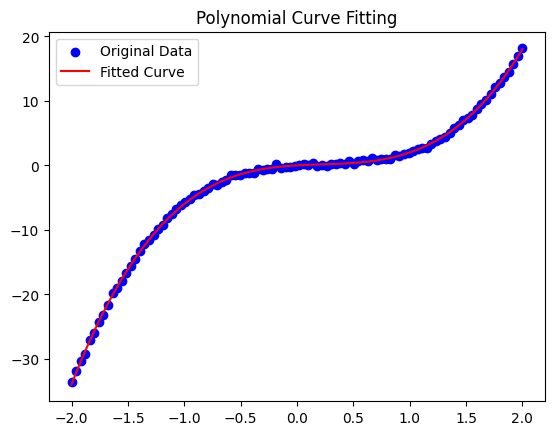

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.manual_seed(42)
x = torch.linspace(-2, 2, 100).reshape(-1, 1)
y = 3 * x**3 - 2 * x**2 + x + torch.randn(x.size()) * 0.2

class PolynomialRegression(nn.Module):
    def __init__(self, degree):
        super(PolynomialRegression, self).__init__()
        self.poly = nn.Linear(degree, 1, bias=False)  # No bias for pure polynomial fitting

    def forward(self, x):
        x_poly = torch.cat([x**i for i in range(1, degree+1)], dim=1)  # Create polynomial features
        return self.poly(x_poly)

degree = 3
model = PolynomialRegression(degree)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 2000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(x)
    loss = criterion(predictions, y)

    loss.backward()
    optimizer.step()

    if (epoch+1) % 200 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    predicted = model(x).detach()

plt.scatter(x, y, label='Original Data', color='blue')
plt.plot(x, predicted, label='Fitted Curve', color='red')
plt.legend()
plt.title('Polynomial Curve Fitting')
plt.show()